In [2]:
!pip install PyQRCode
!pip install pypng

     |████████████████████████████████| 41 kB 78 kB/s 
  Created wheel for PyQRCode: filename=PyQRCode-1.2.1-py3-none-any.whl size=36245 sha256=ac29f4a55fc1ebbd925c5990d313637c130e7227bc32fbcf9deb84a61df5477e
  Stored in directory: /root/.cache/pip/wheels/aa/14/ad/f09824edf35fdc5fd8acc01b60ff57f858f212a2d5c41dddd2
Successfully built PyQRCode
     |████████████████████████████████| 649 kB 598 kB/s 
  Created wheel for pypng: filename=pypng-0.0.20-py3-none-any.whl size=67162 sha256=001a2034dbc1c95aa92fcb7d9eb31d05242c2ac5aabb887b71eed12ab7fed727
  Stored in directory: /root/.cache/pip/wheels/54/64/43/dfd10cf95dc1687dc5350e861321ecd9a5d76b7c3d96fa1dc6
Successfully built pypng


In [4]:
''' dataset path '''
p = []
for dir_name, _, filenames in os.walk('../input/qr-codes/qr_dataset/'):
    for file_name in filenames:
        p += [os.path.join(dir_name, file_name)]
''' Total lenght '''
print(len(p))        

10000


In [5]:
''' Create and Read QR cords '''

''' classes '''
t = ['0123456789','Happy_New_Year','Tokyo_2020_Olympics','Pandemic']

In [6]:
for i in t:
    c = pyqrcode.QRCode(item,error='M')
    c.png('./'+ i + '.png', scale=6)

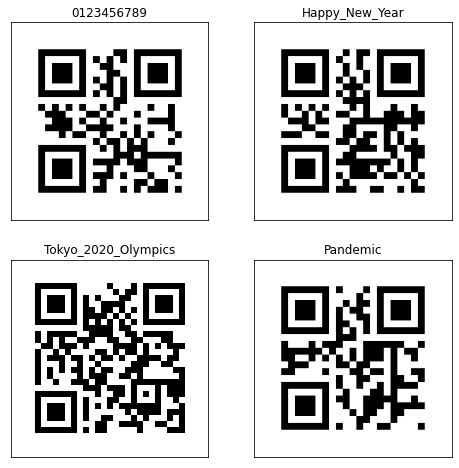

In [8]:
''' plotting images '''

fig,axs = plt.subplots(2,2,figsize=(8,8))
for i in range(4):
    ''' reading images '''
    img = cv2.imread('./'+ t[i] + '.png')
    r = i // 2
    c = i % 2
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].set_title(t[i])
    ax=axs[r][c].imshow(img)
plt.show()

In [9]:
'''Reading method qrdec2_cv2'''
def qr_dec(img):
    qr_c = cv2.QRCodeDetector()
    r, dec_info, p, str_qr = qr_c.detectAndDecodeMulti(img)
    res = [r, dec_info, p, str_qr]
    if r== True:
        return res[1][0]
    else:
        return 'False'

In [10]:
for i in range(4):
    ''' reading images '''
    img = cv2.imread('./'+ t[i] +'.png')
    dc = qr_dec(img)
    print(dc)

0123456789
Happy_New_Year
Tokyo_2020_Olympics
Pandemic


In [11]:
''' Dataset readability ANA '''
ans = []
for i in p:
    ans += [i.split('/')[4][0:-7]]
print(ans[0:10])

['7938', '4007', '5349', '3689', '3846', '7238', '1065', '7938', '6176', '8943']


In [12]:
dc = []
for i in range(10000):
    img = cv2.imread(p[i])
    dc += [qr_dec(img)]
print(DC[0:10])

['7938', '4007', '5349', '3689', '3846', '7238', 'False', '7938', '6176', '8943']


In [13]:
''' accuracy score '''
accuracy_score(ans, dc)

0.9613